In this module, we will learn how to use Spark with Python by using the 'pyspark' library. Spark is one part of the Hadoop ecosystem and is widely popular among data scientists who are working on big data projects. To use Spark, we will need to set up the Amazon AWS account and go over basics of Spark and Hadoop ecosystem.

To start with, big data usually involve distributed systems instead of a local machine. In distributed systems, you can use one machine to control all other machines. Distributed systems are more fault tolerant and it's easy to scale (that is, easy to add more machines in the network). Multiple copies of blocks prevent loss of data due to machine failures. So the distributed system always has a backup copy. 

Mapreduce is a way of splitting a computation task to a distributed set of files (such as HDFS). It consists of a job tracker and multiple task trackers. The job tracker sends codes to run on the task tracker. And the task trackers allocate CPU and memory for the tasks and monitor the tasks on the worker nodes. You can think of Spark as a flexible alternative to MapReduce. Spark can use data stored in a variety of formats such as Cassandra, AWS S3, HDFS and many more. However, MapReduce requires files to be stored in HDFS but Spark does not! Spark is also quicker than MapReduce. This is because MapReduce writes most of the data to disk after each map yet Spark keeps most of the data in memory after each transformation. Spark can spill over to disks if the memory is full. 

In [3]:
from pyspark import SparkContext
import os

In [4]:
os.chdir("C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets")

What is Spark? Spark programming is nothing but a general-purpose and lightning fast cluster computing platform. In other words, it is an open source, wide range data processing engine. That reveals development API's, which also qualifies data workers to accomplish streaming, machine learning or SQL workloads which demand repeated access to data sets. However, Spark can perform batch processing and stream processing. **Batch processing** refers, to the processing of the previously collected job in a single batch. Whereas **stream processing** means to deal with Spark streaming data. Moreover, it is designed in such a way that it integrates with all the big data tools. Like spark can access any Hadoop data source, also can run on Hadoop clusters. Furthermore, Apache Spark extends Hadoop MapReduce to the next level. That also includes iterative queries and stream processing.

One more common belief about Spark is that it is an extension of Hadoop. Although that is not true. However, Spark is independent of Hadoop since it has its own cluster management system. Basically, it uses Hadoop for storage purpose only.
Although, there is one spark's key feature that it has in-memory cluster computation capability. Also increases the processing speed of an application. Basically, Apache Spark offers high-level APIs to users, such as Java, Scala, Python and R. Although, Spark is written in Scala still offers rich APIs in Scala, Java, Python, as well as R. We can say, it is a tool for running Spark applications. 

Apache Spark has many components. For example, **Spark Core** is a central point of Spark. Basically, it provides an execution platform for all the Spark applications. Moreover, to support a wide array of applications, Spark provides a generalized platform. **Spark SQL** enables users to run SQL/HQL queries. We can process structured as well as semi-structured data, by using Spark SQL. Spark Streaming enables a powerful interactive and data analytics application. Moreover, the live streams are converted into micro-batches those are executed on top of spark core. **Spark MLlib** is the component for machine learning. The machine learning library delivers both efficiencies as well as the high-quality algorithms. Moreover, it is the hottest choice for a data scientist. Since it is capable of in-memory data processing, that improves the performance of iterative algorithm drastically. **Spark GraphX** is the graph computation engine built on top of Apache Spark that enables to process graph data at scale. Spark can also be integrated with R and Python. In this module, we focus on the Pythonic aspect of Spark. 

At the core of Spark is the idea of resilient distributed datasets (RDDs), which has 4 main features: 1) distributed collection of data, 2) fault-tolerant, 3) parallel operation (partition) and 4) able to use many data sources. Below is a graphic illustration of how RDDs work: you have a driver program which operates something called a 'SparkContext', which communicates with a cluster manager, which then communicates with the worker nodes. 

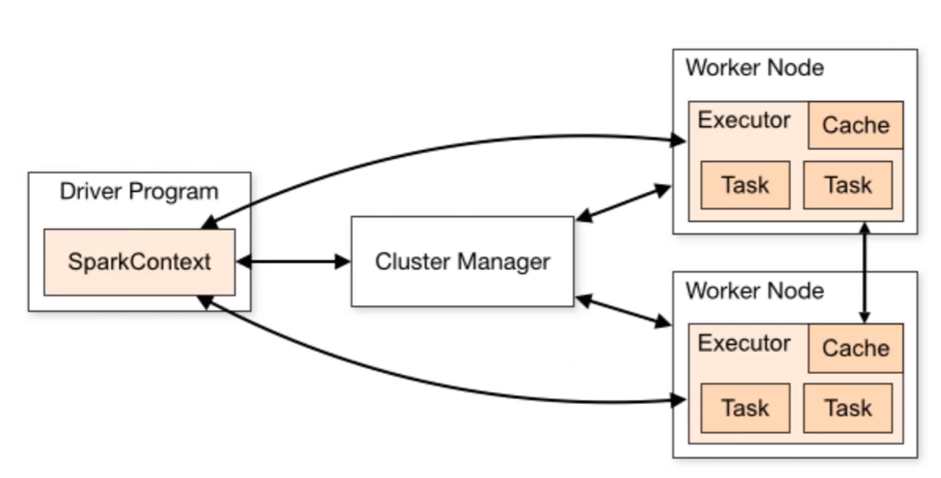

In [3]:
from IPython.display import Image
Image("RDD illustration.PNG")

RDDs are immutable, lazily evaluated, and cacheable. In programming language theory, **lazy evaluation**, or **call-by-need** is an evaluation strategy which delays the evaluation of an expression until its value is needed (non-strict evaluation) and which also avoids repeated evaluations (sharing). The sharing can reduce the running time of certain functions by an exponential factor over other non-strict evaluation strategies, such as call-by-name. The opposite of lazy evaluation is **eager evaluation**, sometimes known as strict evaluation. Eager evaluation is the evaluation strategy employed in most programming languages. Here is an example to illustrate lazy evaluation: in Python 2, the range() function computes a list of integers. The entire list is stored in memory when the first assignment statement is evaluated, so this is an example of eager or immediate evaluation. In Python 3, the range() function returns a special range object which computes elements of the list on demand. Elements of the range object are only generated when they are needed. This is an example of lazy evaluation. The wikipedia page has a very nice illustration: https://en.wikipedia.org/wiki/Lazy_evaluation. 

There are 2 types of operations on RDDs: transformation and action. A **transformation** is a function that produces new RDD from the existing RDDs but when we want to work with the actual dataset, at that point an **action** is performed. When the action is triggered after the result, new RDD is not formed like transformation. You can think of RDD as a generalization of a 'dataset'. Datasets reside in local machines but RDD is a large dataset that is distributed among a cluster of machines. 

In Spark language, Spark transformation is a function that produces new RDD from the existing RDDs. It takes RDD as input and produces one or more RDD as output. Each time it creates new RDD when we apply any transformation. Thus, the so input RDDs, cannot be changed since RDD are immutable in nature. Applying transformation built an RDD lineage, with the entire parent RDDs of the final RDD(s). RDD lineage, also known as RDD operator graph or RDD dependency graph. It is a logical execution plan i.e., it is directed acyclic graph (DAG) of the entire parent RDDs of RDD.

Transformations are lazy in nature. That is, they get execute when we call an action. They are not executed immediately. Two most basic type of transformations is a map(), filter(). After the transformation, the resultant RDD is always different from its parent RDD. It can be smaller (e.g. filter, count, distinct, sample), bigger (e.g. flatMap(), union(), Cartesian()) or the same size.

There are two types of transformations:
   1. Narrow transformation: in narrow transformation, all the elements that are required to compute the records in single partition live in the single partition of parent RDD. A limited subset of partition is used to calculate the result. Narrow transformations are the result of map(), filter().
   2. Wide transformation: in wide transformation, all the elements that are required to compute the records in the single partition may live in many partitions of parent RDD. The partition may live in many partitions of parent RDD. Wide transformations are the result of groupbyKey() and reducebyKey().
   
Below let's see the graphical illustrations from an online tutorial https://data-flair.training/blogs/spark-rdd-operations-transformations-actions/ about transformations: 

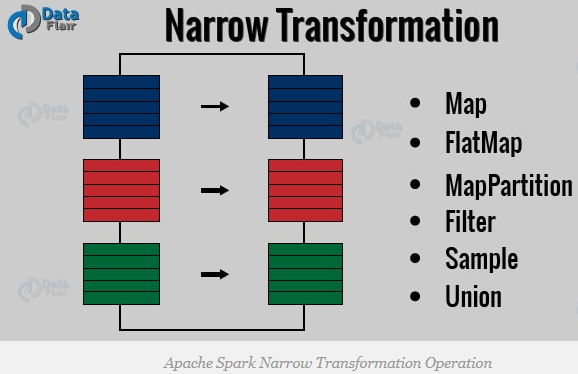

In [4]:
from IPython.display import Image
Image("Spark narrow transformation.PNG")

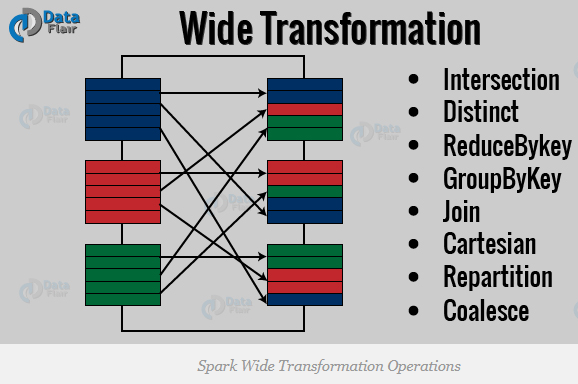

In [5]:
from IPython.display import Image
Image("Spark wide transformation.PNG")

Spark has 4 common actions:
   1. Collect: this action returns all the elements of the RDD as an array at the driver program
   2. Count: this action gives us the number of elements in the RDD
   3. First: this action returns the first element in the RDD
   4. Take: this action returns an array with the first _n_ elements in the RDD

These 4 actions are going to look like methods when we program Python on whatever RDD objects we create. 

Spark also has 3 common transformations:
   1. Filter: this applies a function to each element and returns elements that are evaluated to be True (just like Python's built-in filter() function
   2. Map: this transforms each element and preserves the same number of elements, this is very similar to pandas' applu()
   3. FlatMap: this transforms each element into zero-to-n elements (so it changes the number of elements)
 
There are another 2 useful actions: 1) Reduce() is an action that will aggregate RDD elements using a function that returns a single element. 2) ReduceByKey() is an action that will aggregate pair RDD elements using a function that returns a pair RDD. These are very similar to the group by clause in SQL. 

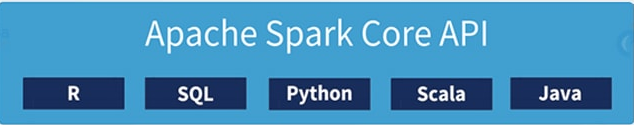

In [6]:
from IPython.display import Image
Image("Spark Core API.PNG")

To fully use the Spark functionality, we need Amazon Web Services (AWS). We need to register at https://aws.amazon.com/. We will be mainly using Amazon EC2, which is essentially a cloud computing tool for big data problems. We will pick the free service and later create an EC2 instance (EC2 for elastic compute cloud). We will then use the secure shell connection (SSH) to connect to EC2 over internet. SSH can be different for Windows vs. Mac. After all these we will set up Spark and Jupyter notebook. 

We now describe the process of creating the EC2 instance in AWS. First, you should go find services called 'EC2' and launch the service once you sign in for the AWS. And then go to the Ubuntu option. Then pick the free option and check the 'configure instance details' option. Use 1 instance for now, since our data won't be big and this will only for demo purpose. Next, go to 'Add Storage' and make sure the default is 8 GB. After this, go to the next page to add tags. Set key=myspark, and value=mymachine. Next we need to configure security group, set type=All Traffic. Make sure you selected 'Create a new security group'. After all these, launch the instance. 

Next, once you launch the instance, you will see a window popping up like below. Choose 'Create a new key pair' (you can name it newspark) and choose 'Download Key Pair':

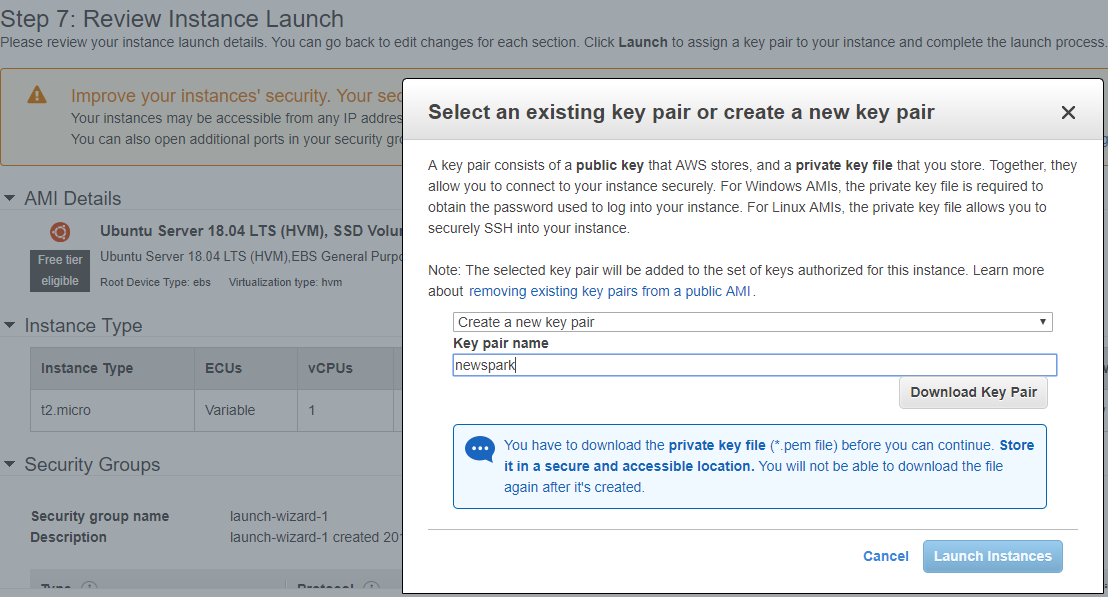

In [5]:
from IPython.display import Image
Image("AWS instruction 1.PNG")

Once you click on the 'Download Key Pair' tab, you will have to download a 'pem' file. Once you are done with all these, you can launch the instance by clicking on the right lower corner. Now you will be directed to the next page, and click on the instance number at the left hand side near the top of the screen. You will then get to see the following:

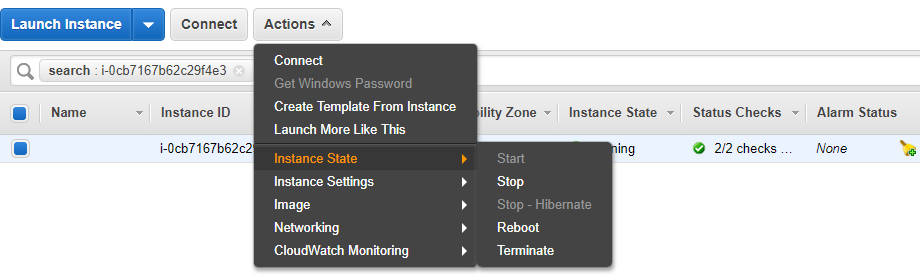

In [8]:
from IPython.display import Image
Image("AWS instruction 2.PNG")

Keep in mind that if you don't want to waste money, always terminate the service by clicking on the 'Action' button at the top if you are done with using AWS. This way it will save you money on unnecessary usage of AWS.

Now let's continue with our instruction. Now, open up a new tab and google the term 'SSH Windows EC2'. Alternatively you can go to here: https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/putty.html. These are the steps we are going to follow for the rest of the lecture. The goal here is to use the putty.exe and puttygen.exe to create a secure connection between your local computer and the virtual computer. You need to download them first from the webpage listed above. Putty does not natively support the private key format (.pem) generated by Amazon EC2. Putty has a tool named Puttygen, which can convert keys to the required Putty format (.ppk). You must convert your private key into this format (.ppk) before attempting to connect to your instance using Putty. Once you are done with the downnload, proceed to the next step. 

First, go to the puttygen.exe file and open the file. At the bottom of the dialog box, select RSA and then click 'Load'. Then select 'All Files' and search for the 'pem' file you downloaded (newspark.pem) and then click on 'Save private key' and name the new file 'puttyspark.ppk'. This step is used to generate the private key used by putty. Once everything is done, you can close the puttygen.exe file. 

Next, go to the putty.exe file and open the file. Fill in the 'Host Name' by copying the Public DNS (IPv4) number. Once you are done, add Ubuntu@ at the beginning of the box. Next, on the left-hand side of the dialog box, go to Connection <- SSH <- Auth and then click on 'Browse'. Now select the file called 'puttyspark.ppk'. Finally, click 'open'. You should get a command prompt. Keep this open for the next step. 

Optional: If you plan to start this session again later, you can save the session information for future use. Choose 'Session' in the 'Category' tree, enter a name for the session in 'Saved Sessions', and then choose 'Save' (e.g. instance 1).

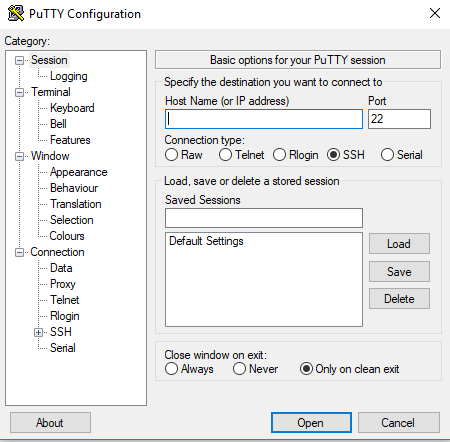

In [9]:
from IPython.display import Image
Image("putty instruction.PNG")

At this moment, take a deep breath! You are now in AWS' virtual machine!

Now we will aim to set up pyspark and jupyter notebook on the virtual computer. In the command line, type in the following (you can change your Anaconda version of course in the command line). Type in the 'wget' clause and the 'bash' clause as below, and then hit 'Enter'. The agreement on the prompt is long so you will need to keep pressing the 'Enter' key and then type 'yes':

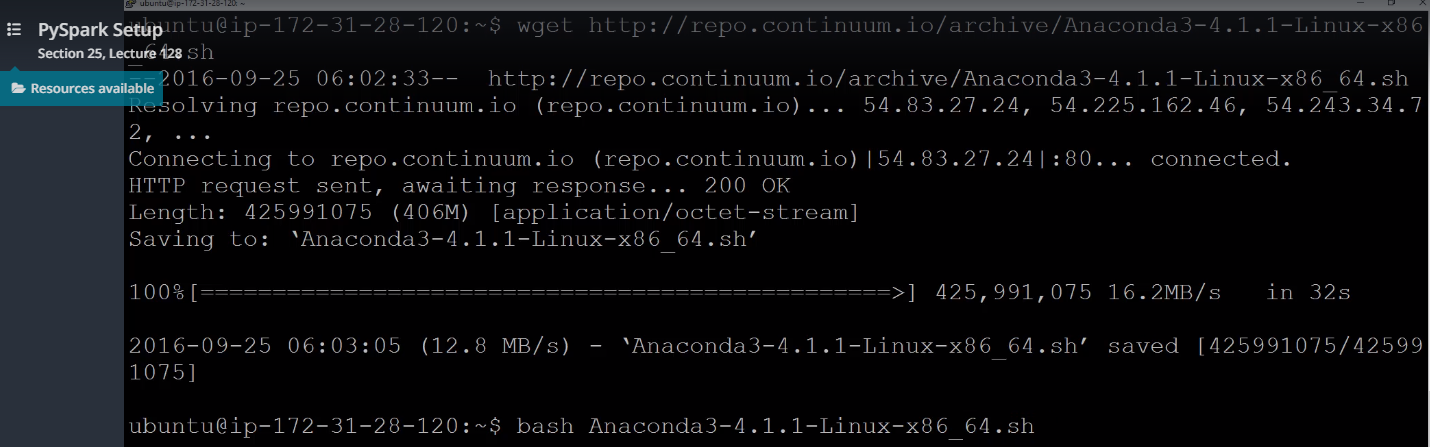

In [10]:
from IPython.display import Image
Image("AWS instruction 3.PNG")

Follow the instruction on the command prompt, we will have Anaconda installed. Now let's check which Python we are using. By default, Ubuntu has Python but we want to use the Anaconda version. Now, follow the screenshot to check the version and correct the Python version the system is defaulted to:

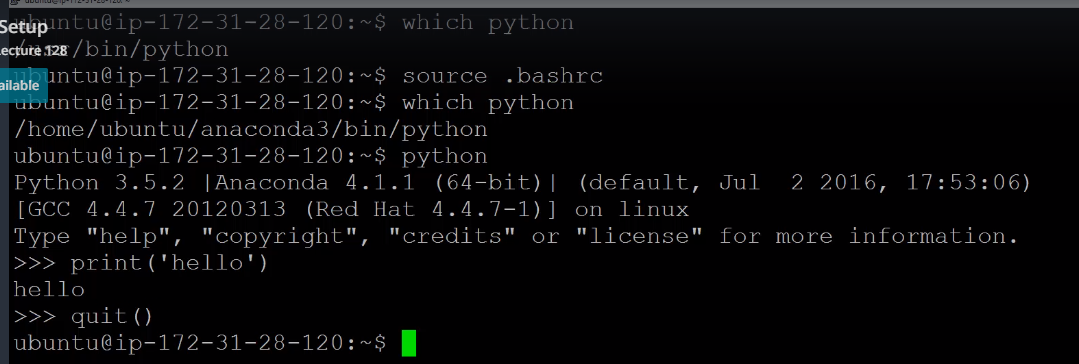

In [11]:
from IPython.display import Image
Image("AWS instruction 4.PNG")

So far we have got Anaconda installed and made sure Anaconda will run. Next, let's get Jupyter notebook for the virtual machine. Now type in all of the commands below (you can leave the last email field blank). This is basically to create a jupyter notebook certification:

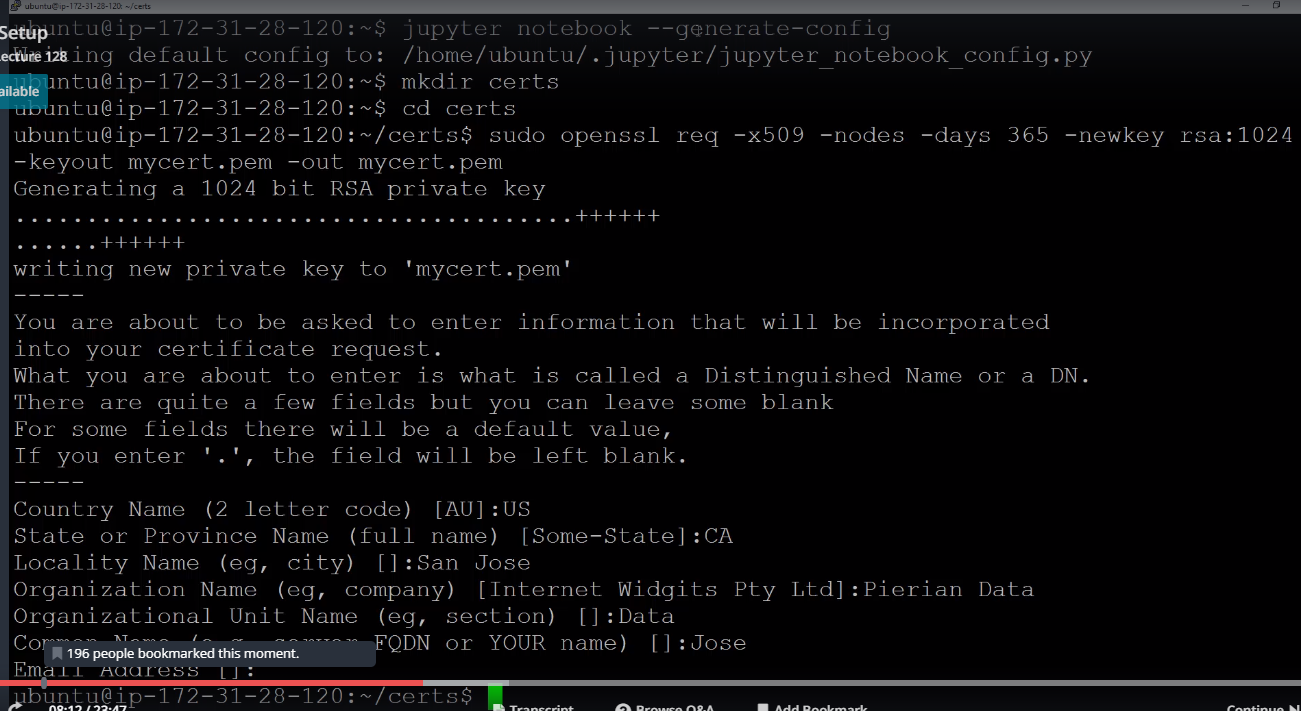

In [12]:
from IPython.display import Image
Image("AWS instruction 5.PNG")

Now clear your prompt by typing in 'clear'. Then type in the following commands:

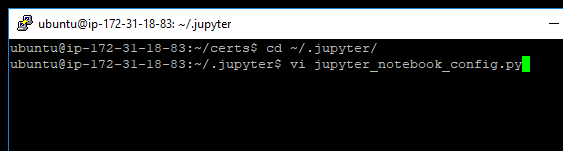

In [13]:
from IPython.display import Image
Image("AWS instruction 6.PNG")

After all the steps above, you should see a screen with blue words. Now it's the important step: press 'I' on your keyboard (so you will see the word 'INSERT' showing up at the bottom of the command line in the virtual machine. Now find the place where you should type in the following, and then hit the 'ESCAPE' key. 

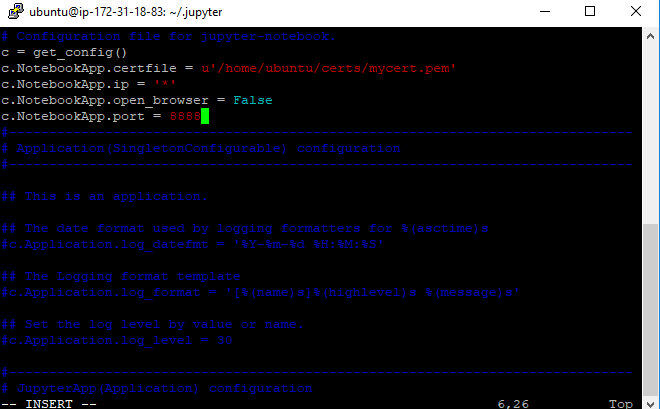

In [14]:
from IPython.display import Image
Image("AWS instruction 7.PNG")

After you hit the 'Esc' key, type in a colon sign _:_, and then type in the following:  _wq!_. This will get you back to your old virtual machine command line. Now let's type in the command: jupyter notebook. You can copy the path in your own browser. Then you can run Jupyter notebook using the virtual machine now!

For local Spark setups: http://www.ubuntu.com/download/desktop/create-a-usb-stick-on-windows.

References:
    - https://data-flair.training/blogs/spark-tutorial/ 
    - https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/putty.html
    - https://medium.com/@alexjsanchez/python-3-notebooks-on-aws-ec2-in-15-mostly-easy-steps-2ec5e662c6c6
    - http://www.ubuntu.com/download/desktop/create-a-usb-stick-on-windows